# 从数据库中获取数据

In [1]:
# 导入需要的模块
import pymysql
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
#连接数据库
db=pymysql.connect(host='localhost',port=3306,user='root',password='123',database='test')
#获取数据
df=pd.read_sql('select * from job_data',con=db)
df

,job_name,company_name,salary,address,experience,level
0,银行电销精英+年底双薪+七险一金,招商信诺人寿保险有限公司,0.8-1万/月,上海-浦东新区,无需经验,中专
1,银行电话客服+六险二金+提成翻倍+月入过万,招商信诺人寿保险有限公司,0.8-1.2万/月,上海-浦东新区,1年经验,大专
2,银行客服月8000/银行官方热线/高级VIP 渠道/正规工号,招商信诺人寿保险有限公司,1-1.5万/月,上海-浦东新区,无需经验,高中
3,招商信诺银行保险电话销售+月入过万+就近分配15,招商信诺人寿保险有限公司,1-1.5万/月,上海-浦东新区,无需经验,高中
4,光大银行直招-远程服务专员,中国光大银行远程银行中心武汉分中心,6-8千/月,武汉-武昌区,无需经验,本科
...,...,...,...,...,...,...
10079,武汉中支非车险部门总,阳光财产保险股份有限公司,15-20万/年,武汉-江汉区,3-4年经验,本科
10080,理赔服务部未决管理岗,阳光财产保险股份有限公司,3-4.5千/月,武汉-江汉区,None,None
10081,理赔服务部查勘定损岗,阳光财产保险股份有限公司,3-4.5千/月,武汉-江汉区,None,None
10082,客户服务部业务管理岗,阳光财产保险股份有限公司,3-4.5千/月,武汉-江汉区,None,None


# 清洗原始数据

In [3]:
#获取工作地点为武汉的数据（排除异地招聘的数据）
df=df[df['address'].apply(lambda x:True if '武汉' in x else False)]
# 增加一列区域
df['area']=df['address'].apply(lambda addr:addr.split('武汉-')[1] if len(addr.split('武汉-'))>=2 else '未知')
#保留salary不为空的行
df=df[df['salary'].apply(lambda x:True if x!=None else False)]
# #定义函数对薪资进行转换然后计算平均薪资（单位千/月）
def average_salary(salary):
    salary=salary.replace('以上','').replace('以下','')
    if '万/月' in salary:
        mylist=salary.split('万/月')[0].split('-')
        if len(mylist)>1:
            mean_salary=(float(mylist[0])+float(mylist[1]))*10/2
        else:
            mean_salary = (float(mylist[0]))*10
    elif '千/月' in salary:
        mylist=salary.split('千/月')[0].split('-')
        if len(mylist)>1:
            mean_salary = (float(mylist[0]) + float(mylist[1]))/2
        else:
            mean_salary = float(mylist[0])
    elif '万/年' in salary:
        mylist = salary.split('万/年')[0].split('-')
        if len(mylist)>1:
            mean_salary = (float(mylist[0]) + float(mylist[1]))*10/12/2
        else:
            mean_salary = float(mylist[0])*10/12
    elif '元/天' in salary:
        mylist = salary.split('元/天')[0].split('-')
        if len(mylist)>1:
            mean_salary = (float(mylist[0]) + float(mylist[1]))/1000*21/2
        else:
            mean_salary = float(mylist[0])/1000*21
    elif '元/小时' in salary:
        mylist = salary.split('元/小时')[0].split('-')
        if len(mylist) > 1:
            mean_salary = (float(mylist[0]) + float(mylist[1]))/1000*8*21/2
        else:
            mean_salary = float(mylist[0])/1000*8*21
    else:
        mean_salary=''
    return  round(mean_salary,1)
df['mean_salary']=df['salary'].apply(average_salary)
df

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,job_name,company_name,salary,address,experience,level,area,mean_salary
4,光大银行直招-远程服务专员,中国光大银行远程银行中心武汉分中心,6-8千/月,武汉-武昌区,无需经验,本科,武昌区,7.0
5,法务管理岗,中建三局绿色产业投资有限公司,1.3-2万/月,武汉-武汉经济开发区,5-7年经验,本科,武汉经济开发区,16.5
8,广发证券武汉友谊大道营业部（柜台业务主办）,广发证券股份有限公司湖北分公司,4.5-6千/月,武汉,None,None,未知,5.2
9,JAVA开发工程师（武汉）(J10388),银联商务股份有限公司,15-30万/年,武汉-洪山区,2年经验,本科,洪山区,18.8
10,银行驻点大堂岗/就近分配/双休,安盛天平财产保险股份有限公司,0.5-1万/月,武汉-汉阳区,无需经验,大专,汉阳区,7.5
...,...,...,...,...,...,...,...,...
10079,武汉中支非车险部门总,阳光财产保险股份有限公司,15-20万/年,武汉-江汉区,3-4年经验,本科,江汉区,14.6
10080,理赔服务部未决管理岗,阳光财产保险股份有限公司,3-4.5千/月,武汉-江汉区,None,None,江汉区,3.8
10081,理赔服务部查勘定损岗,阳光财产保险股份有限公司,3-4.5千/月,武汉-江汉区,None,None,江汉区,3.8
10082,客户服务部业务管理岗,阳光财产保险股份有限公司,3-4.5千/月,武汉-江汉区,None,None,江汉区,3.8


# 利用清洗好的数据制作图表

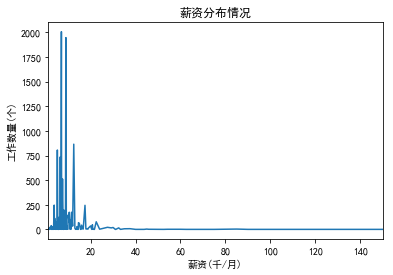

In [4]:
#薪资整体分布情况
df_salary=df['mean_salary'].value_counts()
df_salary=df_salary.sort_index()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
df_salary.plot(kind='line')
plt.xlabel('薪资(千/月)')
plt.ylabel('工作数量(个)')
plt.title('薪资分布情况')
plt.show()

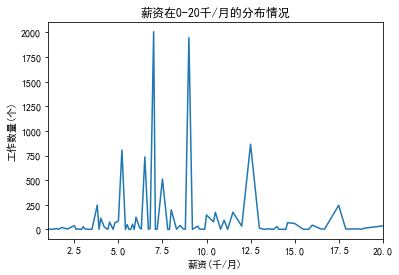

In [5]:
#薪资在0-20千/月的分布情况
df_salary=df['mean_salary'].value_counts()
df_salary=df_salary.sort_index()
df_salary=df_salary[df_salary.index<=20]
df_salary.plot(kind='line')
plt.xlabel('薪资(千/月)')
plt.ylabel('工作数量(个)')
plt.title('薪资在0-20千/月的分布情况')
plt.show()

In [6]:
# 学历分析

In [7]:
#学历分布情况
df_level=df['level'].value_counts(ascending=True)
df_level

博士          1
初中及以下       5
中技         19
硕士         33
中专        227
高中        302
本科        817
大专       1922
Name: level, dtype: int64

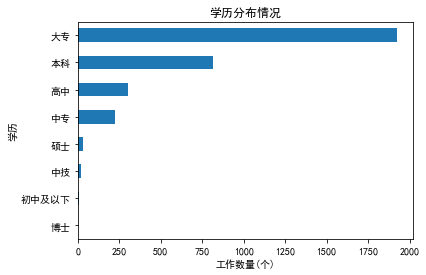

In [8]:
df_level.plot(kind='barh')
plt.xlabel('工作数量(个)')
plt.ylabel('学历')
plt.title('学历分布情况')
plt.show()

In [9]:
df_level_mean_salary=df.groupby(by='level')['mean_salary'].mean().sort_values()
df_level_mean_salary

level
初中及以下     5.140000
中专        8.868282
高中        8.889073
中技        8.973684
大专       10.130697
本科       12.198654
硕士       15.833333
博士       30.000000
Name: mean_salary, dtype: float64

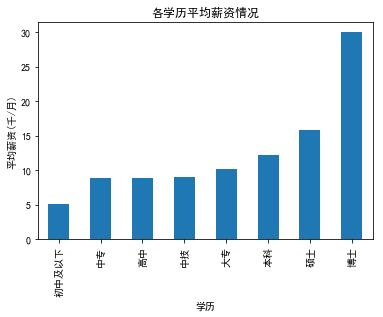

In [10]:
df_level_mean_salary.plot(kind='bar')
plt.xlabel('学历')
plt.ylabel('平均薪资(千/月)')
plt.title('各学历平均薪资情况')
plt.show()

In [11]:
# 地区分析

In [12]:
#地区分布情况
df_area=df[df.area!='未知']['area'].value_counts(ascending=True)
df_area

汉南区              1
新洲区              4
青山区              6
蔡甸区             17
黄陂区             25
武汉经济开发区         69
东西湖区            78
东湖新技术产业开发区     254
汉阳区            261
汉口区            325
江岸区            404
江夏区           1084
武昌区           1194
江汉区           1497
洪山区           3676
Name: area, dtype: int64

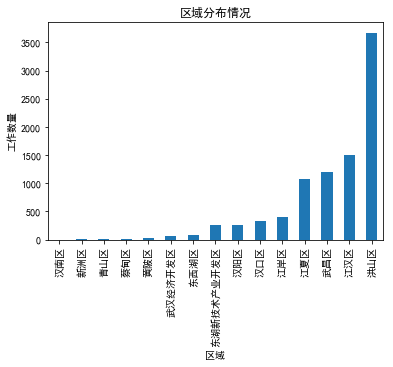

In [13]:
df_area.plot(kind='bar')
plt.xlabel('区域')
plt.ylabel('工作数量')
plt.title('区域分布情况')
plt.show()